# Pré-processamento nos dados
***

### Importações
***

In [58]:
import cv2                  
import numpy as np                   
import matplotlib.pyplot as plt      
import random
from scipy.signal import convolve2d
import skimage.morphology   

### Pré-processamento  nos caracteres individuais
***

In [6]:
img_in = cv2.imread('images/digitalizacao.jpeg',0)

img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)

g1 = np.zeros (img_in.shape, img_in.dtype)
g2 = np.zeros (img_in.shape, img_in.dtype)
g3 = np.zeros (img_in.shape, img_in.dtype)

g= img_in
im1= cv2.intensity_transform.contrastStretching(img_in,g1,0,255,255,0)
im2= cv2.intensity_transform.contrastStretching(img_in,g2,10,100,0,10)
im3= cv2.intensity_transform.gammaCorrection(img_in,g3,16)


Text(0.5, 1.0, 'gammaCorrection: 16')

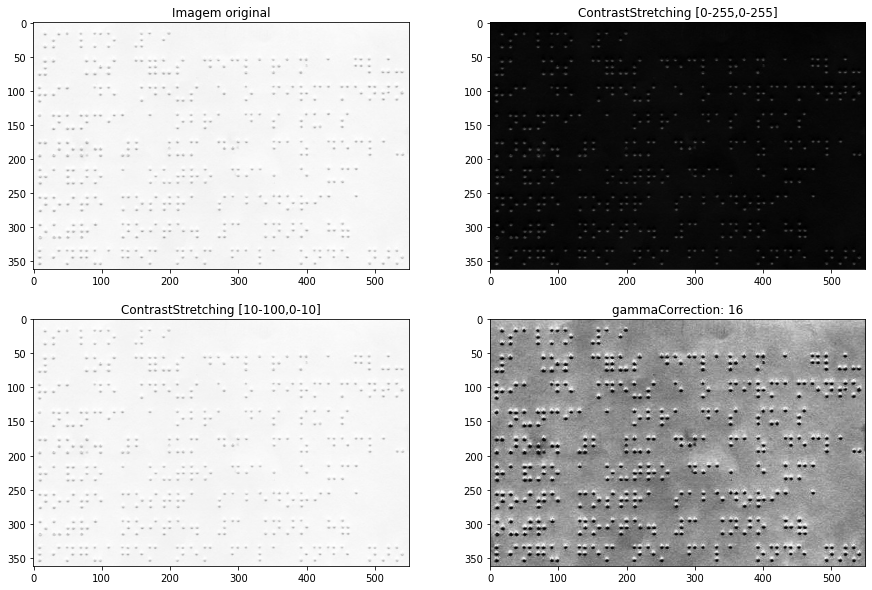

In [7]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
axs[0,0].imshow(g)
axs[0,0].set_title("Imagem original", size=12)
axs[0,1].imshow(g1)
axs[0,1].set_title("ContrastStretching [0-255,0-255]",size=12)
axs[1,0].imshow(g2)
axs[1,0].set_title("ContrastStretching [10-100,0-10]",size=12)
axs[1,1].imshow(g3)
axs[1,1].set_title("gammaCorrection: 16",size=12)

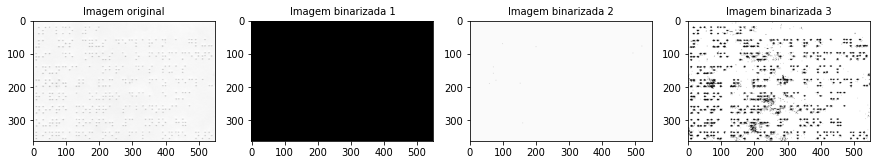

In [8]:
th, im_th = cv2.threshold(g1, 160, 250, cv2.THRESH_BINARY)

th, im_th2 = cv2.threshold(g, 145, 250, cv2.THRESH_BINARY)

th, im_th3 = cv2.threshold(g3, 110, 255, cv2.THRESH_BINARY)

figure, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(15, 15))
axs[0].set_title("Imagem original", size = 10)
axs[0].imshow(img_in)
axs[1].set_title("Imagem binarizada 1", size = 10)
axs[1].imshow(im_th)
axs[2].set_title("Imagem binarizada 2", size = 10)
axs[2].imshow(im_th2)
axs[3].set_title("Imagem binarizada 3", size = 10)
axs[3].imshow(im_th3)

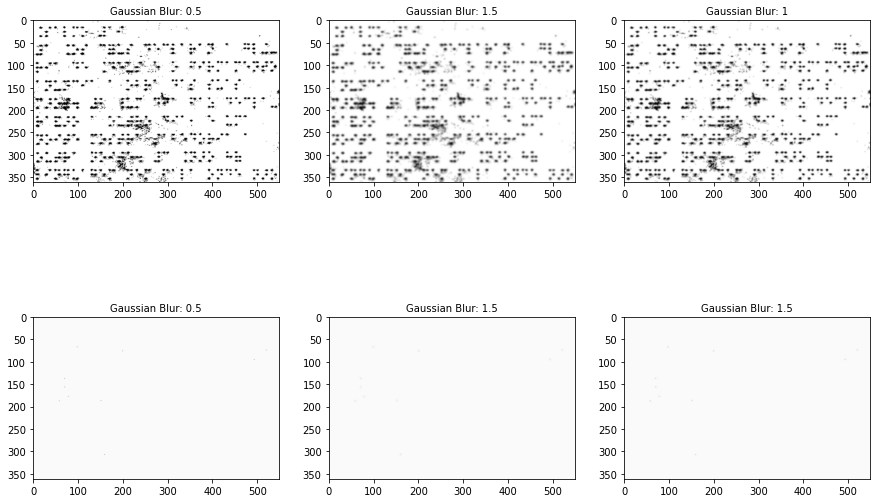

In [9]:
nsize=21
size = (nsize,nsize)


im_out1 = cv2.GaussianBlur(im_th3, size, 0.5)
im_out2 = cv2.GaussianBlur(im_th3, size, 1.5)
im_out3 = cv2.GaussianBlur(im_th3, size, 1)

im_out11 = cv2.GaussianBlur(im_th2, size, 0.5)
im_out22 = cv2.GaussianBlur(im_th2, size, 1.5)
im_out33 = cv2.GaussianBlur(im_th2, size, 1)

figure, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 10))
axs[0,0].set_title("Gaussian Blur: 0.5",fontsize= 10)
axs[0,0].imshow(im_out1,vmin=im_out1.min(),vmax=im_out1.max())
axs[0,1].set_title("Gaussian Blur: 1.5",fontsize= 10)
axs[0,1].imshow(im_out2,vmin=im_out2.min(),vmax=im_out2.max())
axs[0,2].set_title("Gaussian Blur: 1",fontsize= 10)
axs[0,2].imshow(im_out3,vmin=im_out3.min(),vmax=im_out3.max())
axs[1,0].set_title("Gaussian Blur: 0.5",fontsize= 10)
axs[1,0].imshow(im_out11,vmin=im_out1.min(),vmax=im_out1.max())
axs[1,1].set_title("Gaussian Blur: 1.5",fontsize= 10)
axs[1,1].imshow(im_out22,vmin=im_out2.min(),vmax=im_out2.max())
axs[1,2].set_title("Gaussian Blur: 1.5",fontsize= 10)
axs[1,2].imshow(im_out33,vmin=im_out2.min(),vmax=im_out2.max())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


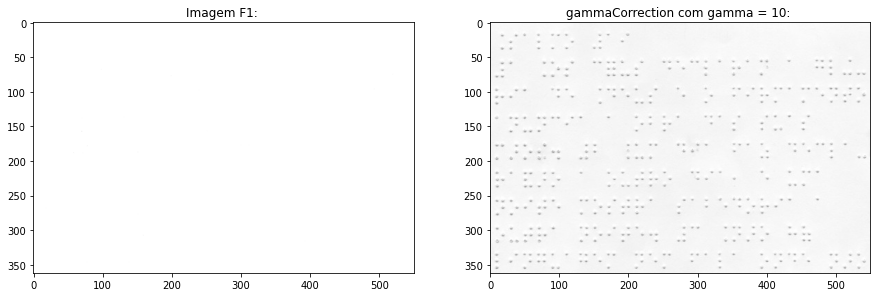

In [10]:
f = img_in


F1 = f.astype(np.int32)
F2 = f.astype(np.int32)

F1=2*F1-40

img_tranformada = cv2.intensity_transform.gammaCorrection(f,F2,10)

figure, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 10))
axs[0].set_title("Imagem F1: ",size =12)
axs[0].imshow(F1,vmin=F1.min(),vmax=F1.max())
axs[1].set_title("gammaCorrection com gamma = 10: ",size =12)
axs[1].imshow(F2,vmin=F2.min(),vmax=F2.max())


In [11]:
W = 2
H = 2
R= 1
A = 1
kernel = cv2.getStructuringElement( cv2.MORPH_RECT, (W,H) )

dst_img2 = cv2.dilate( im_th3, kernel, iterations = 1 )

kernel2 = skimage.morphology.star( A)

dst_img3= cv2.dilate( im_th3, kernel2, iterations = 1 )
                                   
kernel3 = cv2.getStructuringElement( cv2.MORPH_CROSS, (W,H) )  
                                   
dst_img4= cv2.dilate( im_th3, kernel3, iterations = 1 )

kernel4 = skimage.morphology.disk( R )

dst_img5= cv2.dilate( im_th3, kernel4, iterations = 1 )

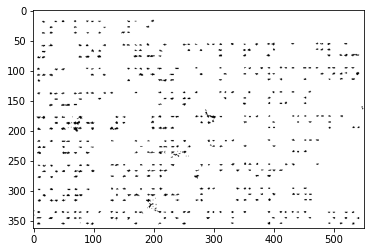

In [12]:
plt.imshow(dst_img5)

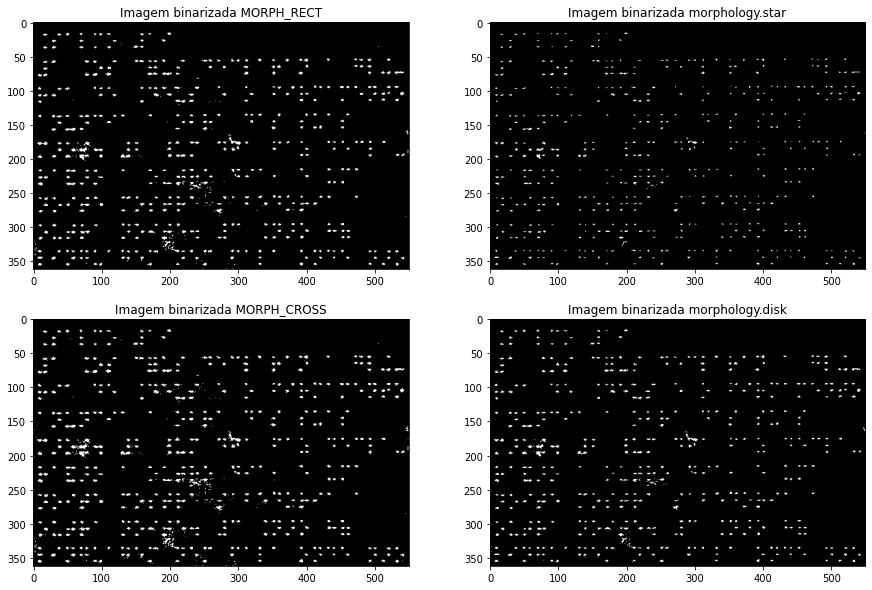

In [13]:
figure, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 10))

axs[0,0].set_title("Imagem binarizada MORPH_RECT")
axs[0,0].imshow(~dst_img2,cmap="gray")
axs[0,1].set_title("Imagem binarizada morphology.star")
axs[0,1].imshow(~dst_img3,cmap="gray")
axs[1,0].set_title("Imagem binarizada MORPH_CROSS")
axs[1,0].imshow(~dst_img4,cmap="gray")
axs[1,1].set_title("Imagem binarizada morphology.disk")
axs[1,1].imshow(~dst_img5,cmap="gray")

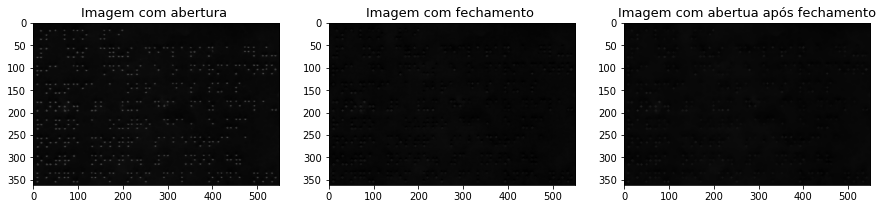

In [14]:
kernel = skimage.morphology.disk( 2)

dst_img_open = cv2.morphologyEx(img_in, cv2.MORPH_OPEN, kernel)

dst_img_close = cv2.morphologyEx(img_in, cv2.MORPH_CLOSE, kernel)

dst_img_open_after_close = cv2.morphologyEx(dst_img_close, cv2.MORPH_OPEN, kernel)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 15))

axs[0].set_title("Imagem com abertura ",size = 13)
axs[0].imshow(~dst_img_open,vmin=0, vmax=1, cmap="gray")

axs[1].set_title("Imagem com fechamento ",size = 13)
axs[1].imshow(~dst_img_close,vmin=0, vmax=1, cmap="gray")

axs[2].set_title("Imagem com abertua após fechamento",size = 13)
axs[2].imshow(~dst_img_open_after_close,vmin=0, vmax=1, cmap="gray")


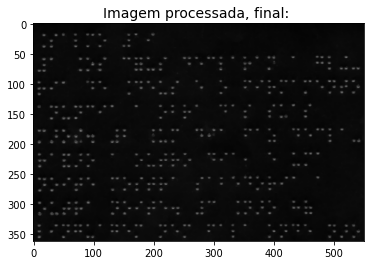

In [15]:
kernel = skimage.morphology.disk( 1.4)

img_final = cv2.dilate(~dst_img_open, kernel, iterations = 1 )

plt.title("Imagem processada, final: ",size = 14)
plt.imshow(img_final,vmin=0, vmax=1, cmap="gray")

Text(0.5, 1.0, 'Detector de Canny')

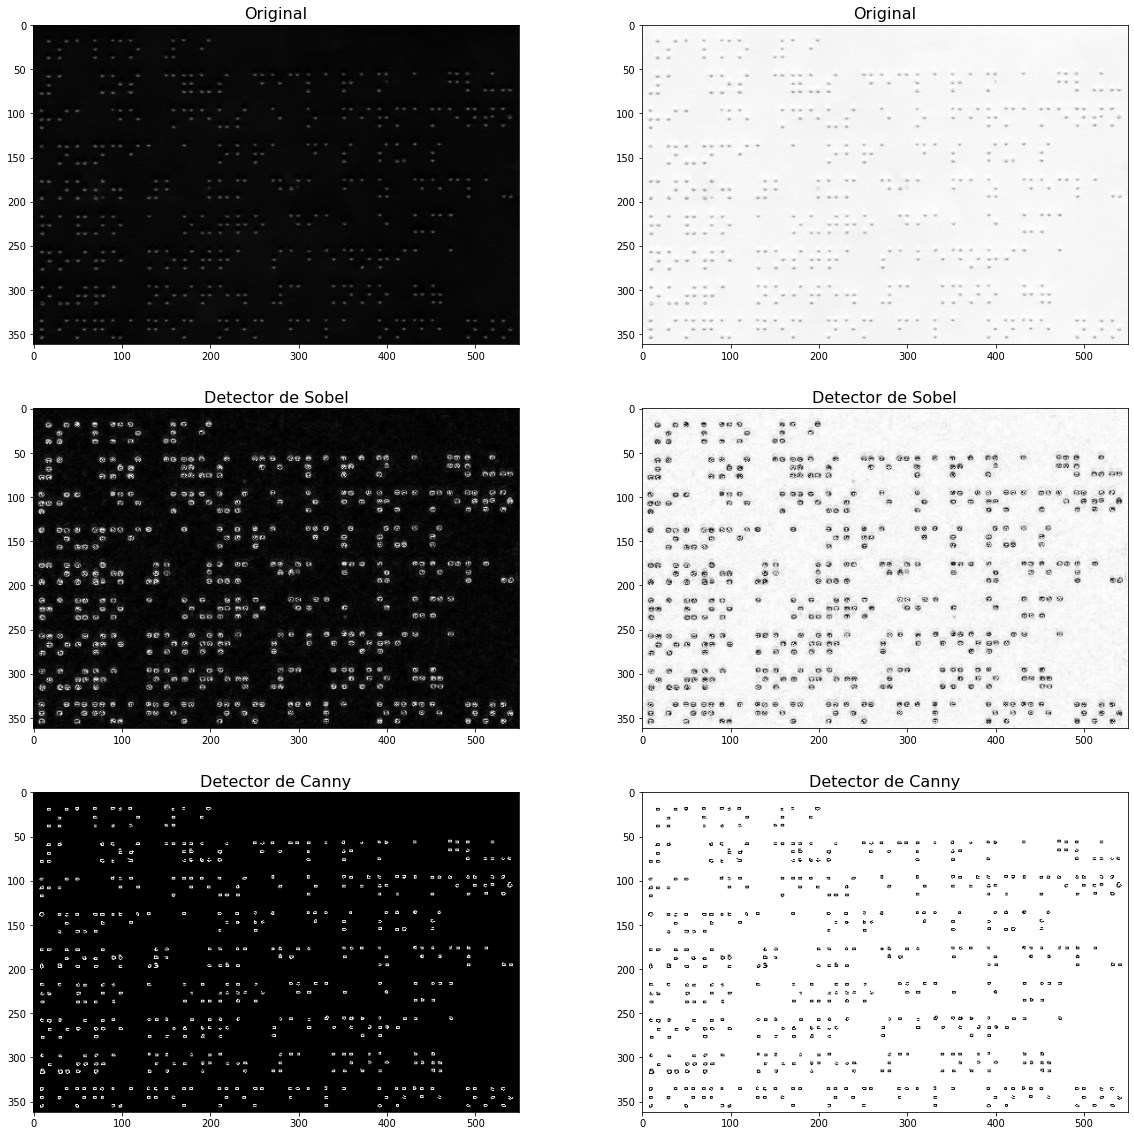

In [16]:
canny_output = cv2.Canny(img_in, 90, 180, L2gradient = True )
sobel_x = cv2.convertScaleAbs(cv2.Sobel(img_in, cv2.CV_16S, 1, 0, ksize=3))
sobel_y = cv2.convertScaleAbs(cv2.Sobel(img_in, cv2.CV_16S, 0, 1, ksize=3))
sobel_output = sobel_x + sobel_y

# Plots
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 20))
    
# Imagem Original
axs[0,1].imshow(img_in, cmap="gray")
axs[0,1].set_title("Original", fontsize = 16)
axs[0,0].imshow(~img_in, cmap="gray")
axs[0,0].set_title("Original", fontsize = 16)

# Filtragem
axs[1,0].imshow(sobel_output, vmin = 0, vmax = 255, cmap="gray")
axs[1,0].set_title("Detector de Sobel", fontsize = 16)
axs[1,1].imshow(~sobel_output, vmin = 0, vmax = 255, cmap="gray")
axs[1,1].set_title("Detector de Sobel", fontsize = 16)

# Filtragem
axs[2,0].imshow(canny_output, vmin = 0, vmax = 255, cmap="gray")
axs[2,0].set_title("Detector de Canny", fontsize = 16)
axs[2,1].imshow(~canny_output, vmin = 0, vmax = 255, cmap="gray")
axs[2,1].set_title("Detector de Canny", fontsize = 16)

### Pré-processamento nas imagens de texto com vários caracteres
***

In [17]:
def preprocessing_sobel(img_in):
    '''
    Detecta as bordas da imagem utilizando o filtro sobrel

    Entrada:
    img_in -> array da imagem

    Saída:
    sobel_output -> imagem com as bordas detectadas

    '''
    
    sobel_x = cv2.convertScaleAbs(cv2.Sobel(img_in, cv2.CV_16S, 1, 0, ksize=3))
    sobel_y = cv2.convertScaleAbs(cv2.Sobel(img_in, cv2.CV_16S, 0, 1, ksize=3))
    sobel_output = sobel_x + sobel_y
    
    return ~sobel_output

In [51]:
def preprocessing_canny(img_in):
    '''
    Detecta as bordas da imagem utilizando o método de canny

    Entrada:
    img_in -> array da imagem

    Saída:
    dilatada_canny -> Imagem com as bordas detectadas
    '''
    
    canny_output = cv2.Canny(img_in, 90, 180, L2gradient = True )
    
    kernel = skimage.morphology.disk( 1)
    
    dilatada_canny = cv2.dilate(canny_output, kernel, iterations = 1 )
    
    return ~dilatada_canny

In [52]:
def opening_and_binarize(img_in):
    '''
    Realiza o processo de abertura e fechamento na imagem e a retorna binarizada

    Entrada:
    img_in -> Imagem armazenada em um array

    Saída:
    img_dilated_open_binarized -> Imagem pré-processada
    '''
    kernel = skimage.morphology.disk( 1)

    dst_img_open = cv2.morphologyEx(img_in, cv2.MORPH_OPEN, kernel)
    dst_img_close = cv2.morphologyEx(img_in, cv2.MORPH_CLOSE, kernel)
    
    kernel = skimage.morphology.disk(1.4)
    
    img_dilated_open_binarized= cv2.dilate(~dst_img_open, kernel, iterations = 1)

    for i in range(0, img_dilated_open_binarized.shape[0]):
        for j in range(0, img_dilated_open_binarized.shape[1]):
            if img_dilated_open_binarized[i][j] == 255:
                img_dilated_open_binarized[i][j] = 1
            else:
                img_dilated_open_binarized[i][j] = 0
    

    return ~img_dilated_open_binarized

In [53]:
preprocessada_canny = preprocessing_canny(img_in)
preprocessada_sobel = preprocessing_sobel(img_in)

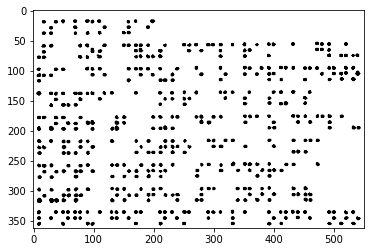

In [54]:
plt.imshow(preprocessada_canny, vmin=np.min(img_in), vmax=np.max(img_in),cmap = "gray")

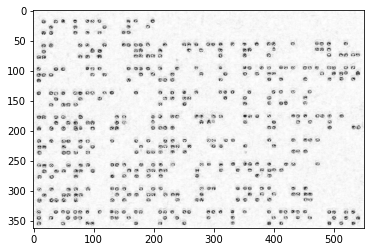

In [55]:
plt.imshow(preprocessada_sobel, vmin=np.min(img_in), vmax=np.max(img_in),cmap = "gray")

Text(0.5, 1.0, 'Detector de Canny + dilatação')

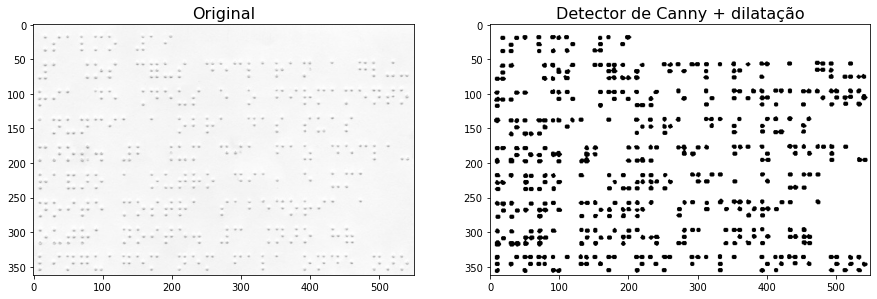

In [23]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 15))
    
axs[0].imshow(img_in, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

axs[1].imshow(opening_and_binarize(preprocessada_canny), cmap="gray")
axs[1].set_title("Detector de Canny + dilatação", fontsize = 16)

Text(0.5, 1.0, 'Detector de Sobel + dilatação')

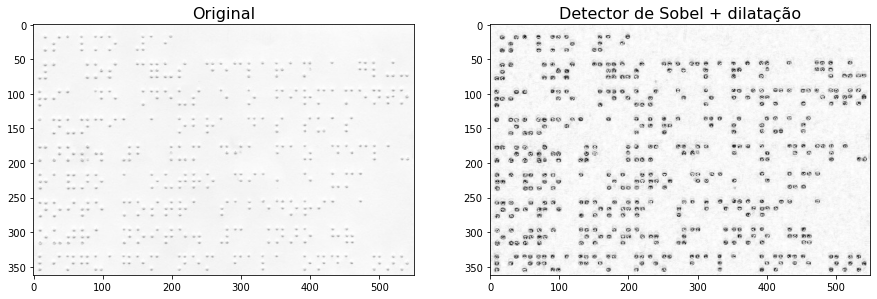

In [26]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 15))
    
axs[0].imshow(img_in, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

axs[1].imshow(preprocessada_sobel, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Detector de Sobel + dilatação", fontsize = 16)
